<a href="https://colab.research.google.com/github/sabotagefrenzy/Spam-Detection-GDSC/blob/main/SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
#from text_process import line_processing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [200]:
import nltk
import heapq
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [201]:
df = pd.read_csv('spam.csv', encoding='latin-1')
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [202]:
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [203]:
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df['message_len'] = df.message.apply(len)
df.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

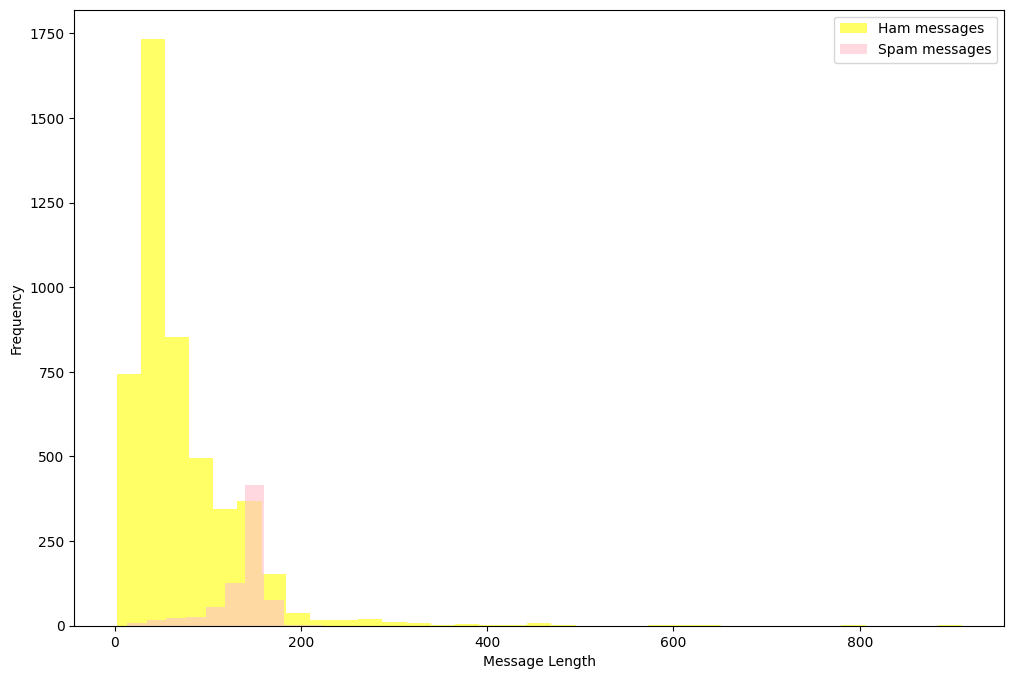

In [204]:
plt.figure(figsize=(12, 8))

df[df.label=='ham'].message_len.plot(bins=35, kind='hist', color='yellow',
                                       label='Ham messages', alpha=0.6)
df[df.label=='spam'].message_len.plot(kind='hist', color='pink',
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [205]:

from nltk.corpus import stopwords

def text_process(mess):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

df.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [206]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
df['clean_msg']= df['message'].apply(lambda x:remove_punctuation(x))
df.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,0,49,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah I dont think he goes to usf he lives aroun...


In [207]:
print(df.columns)

Index(['label', 'message', 'label_num', 'message_len', 'clean_msg'], dtype='object')


In [208]:
X = df.clean_msg
y = df.label_num
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(5572,)
(4179,)
(1393,)
(4179,)
(1393,)


In [209]:
featurizer = CountVectorizer()
featurizer.fit(X_train)
X_train_dtm = featurizer.transform(X_train)
X_train_dtm = featurizer.fit_transform(X_train)
print(type(X_train_dtm), X_train_dtm.shape)
X_test_dtm = featurizer.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4179, 8114)
<class 'scipy.sparse._csr.csr_matrix'> (1393, 8114)


In [210]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4179x8114 sparse matrix of type '<class 'numpy.float64'>'
	with 54527 stored elements in Compressed Sparse Row format>

In [211]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: user 5.53 ms, sys: 0 ns, total: 5.53 ms
Wall time: 5.16 ms


MultinomialNB()

In [212]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
cm = confusion_matrix(y_test, y_pred_class)
# Accuracy
accuracy = accuracy_score(y_test, y_pred_class)
# Precision
precision = precision_score(y_test, y_pred_class)
# Recall
recall = recall_score(y_test, y_pred_class)
# F1-Score
f1 = f1_score(y_test, y_pred_class)
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_class)
roc_auc = auc(fpr, tpr)

print("Confusion Matrix:")
print(cm)
print("Accuracy:", round(accuracy,4)*100,"%")
print("Precision:", round(precision,4)*100,"%")
print("Recall:", round(recall,4)*100,"%")
print("F1-Score:", round(f1,3)*100,"%")
print("ROC AUC:", round(roc_auc,4)*100,"%")

Confusion Matrix:
[[1207    6]
 [  19  161]]
Accuracy: 98.21 %
Precision: 96.41 %
Recall: 89.44 %
F1-Score: 92.80000000000001 %
ROC AUC: 94.47 %


In [214]:
from collections import Counter

words = df[df.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

print(ham_words.most_common(50))

[('i', 2185), ('you', 1837), ('to', 1554), ('the', 1118), ('a', 1052), ('u', 972), ('and', 848), ('in', 811), ('me', 756), ('my', 743), ('is', 728), ('it', 590), ('of', 524), ('for', 501), ('that', 486), ('im', 449), ('have', 438), ('but', 418), ('your', 414), ('so', 412), ('are', 409), ('not', 406), ('on', 391), ('at', 377), ('do', 377), ('can', 376), ('if', 347), ('will', 334), ('be', 332), ('2', 305), ('get', 303), ('its', 297), ('we', 297), ('just', 289), ('now', 289), ('up', 282), ('ltgt', 276), ('when', 273), ('ok', 272), ('no', 272), ('with', 271), ('dont', 257), ('how', 255), ('go', 247), ('this', 243), ('what', 242), ('ur', 240), ('all', 239), ('ill', 236), ('know', 232)]


In [216]:
words = df[df.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)

print(spam_words.most_common(50))

[('to', 686), ('a', 376), ('call', 347), ('you', 287), ('your', 263), ('free', 216), ('the', 204), ('for', 203), ('now', 189), ('or', 188), ('2', 173), ('is', 158), ('txt', 150), ('u', 147), ('on', 144), ('ur', 144), ('have', 135), ('from', 128), ('mobile', 123), ('and', 122), ('text', 120), ('4', 119), ('claim', 113), ('stop', 113), ('with', 109), ('reply', 101), ('of', 95), ('prize', 92), ('this', 87), ('our', 85), ('get', 83), ('are', 80), ('only', 79), ('just', 77), ('in', 73), ('won', 73), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('no', 60), ('out', 56), ('contact', 56), ('service', 55), ('be', 52), ('please', 52), ('guaranteed', 50), ('customer', 49)]


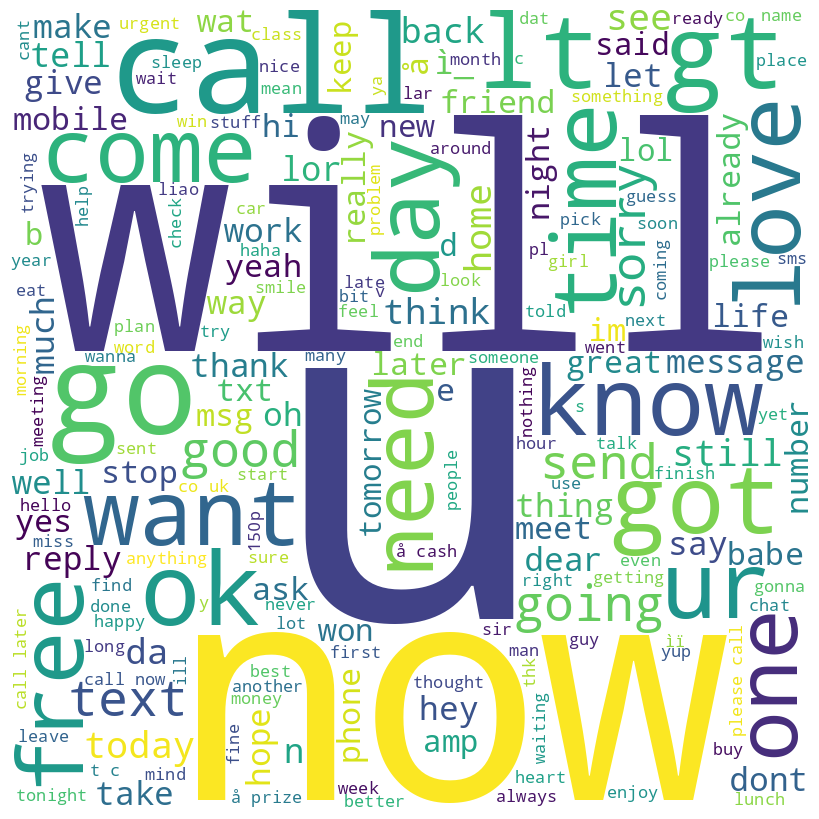

In [219]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in df.message:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [220]:
#false postives
X_test[y_pred_class > y_test]

2418    Madamregret disturbancemight receive a referen...
4598               Have you laid your airtel line to rest
1289    HeyGreat dealFarm tour 9am to 5pm 95pax 50 dep...
573                                 Waiting for your call
3373                              Also andros ice etc etc
494                        Are you free nowcan i call now
Name: clean_msg, dtype: object

In [221]:
#false negatives
X_test[y_pred_class < y_test]

4674    Hi babe its Chloe how r u I was smashed on sat...
3528    Xmas  New Years Eve tickets are now on sale fr...
5035    You wont believe it but its true Its Incredibl...
1499    SMS ac JSco Energy is high but u may not know ...
3417    LIFE has never been this much fun and great un...
2773    How come it takes so little time for a child w...
1960    Guess what Somebody you know secretly fancies ...
5       FreeMsg Hey there darling its been 3 weeks now...
517     Your credits have been topped up for httpwwwbu...
2078                         85233 FREERingtoneReply REAL
1457    CLAIRE here am havin borin time  am now alone ...
190     Are you unique enough Find out from 30th Augus...
2429    Guess who am IThis is the first time I created...
3057    You are now unsubscribed all services Get tons...
1021    Guess what Somebody you know secretly fancies ...
4067    TBSPERSOLVO been chasing us since Sept forå£38...
3358    Sorry I missed your call lets talk when you ha...
2821    ROMCAP